In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
#data cleaning
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#feature engineering
male=pd.get_dummies(df['sex'],drop_first=True)
df=pd.concat([df,male],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [ ]:
df.drop('Smoker',axis=1,inplace=True)
df.head()
smoker=pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df,smoker],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,northwest,southeast,southwest,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,False,False,True,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,True,False,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,True,False,False
3,33,male,22.705,0,no,northwest,21984.47061,True,True,False,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,True,False,False,False


In [ ]:
Region=pd.get_dummies(df['region'],drop_first=True)
df=pd.concat([df,Region],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,False,True,False,False


In [ ]:
df = df.rename(columns = {'yes':'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,northwest,southeast,southwest,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,False,False,True,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,True,False,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,True,False,False
3,33,male,22.705,0,no,northwest,21984.47061,True,True,False,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,True,False,False,False


<ipython-input-15-9c4c005580fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data= df, palette = 'GnBu')


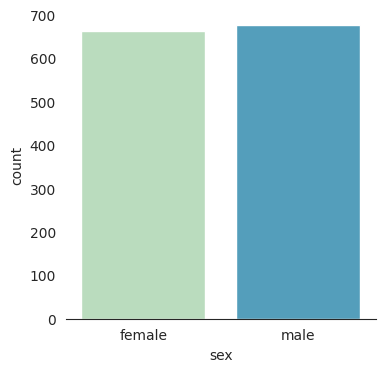

In [ ]:
plt.figure(figsize = (4,4))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

<ipython-input-20-23e6236414a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu')


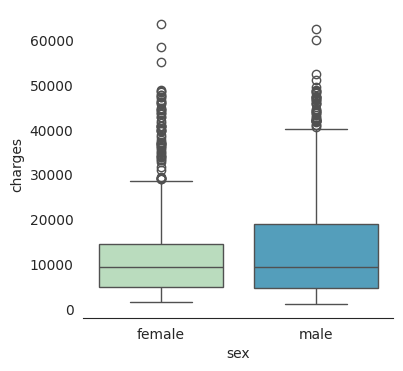

In [ ]:
plt.figure(figsize = (4,4))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu')
sns.despine(left = True)

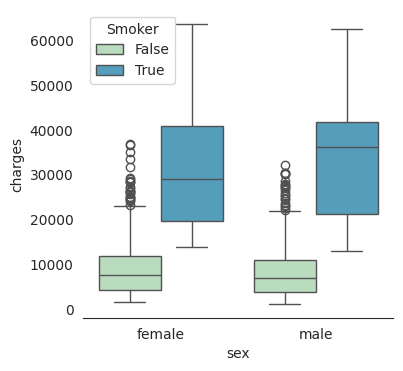

In [ ]:
plt.figure(figsize = (4,4))
sns.set_style('white')
sns.boxplot(x='sex', y = 'charges', data = df, palette ='GnBu',hue = "Smoker")
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

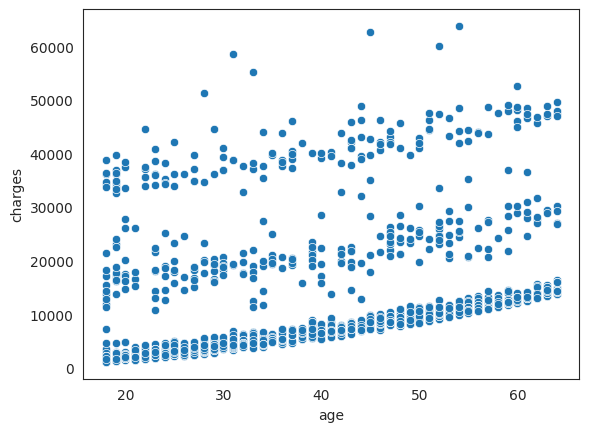

In [ ]:
sns.scatterplot(x="age",y="charges",data=df)

<Axes: xlabel='age', ylabel='charges'>

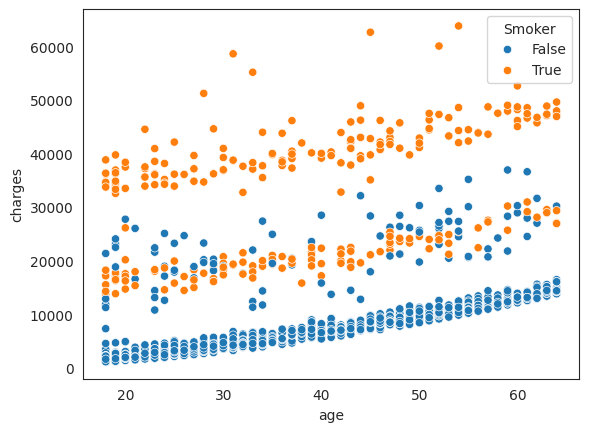

In [ ]:
sns.scatterplot(x="age",y="charges",data=df,hue="Smoker")

<Axes: xlabel='bmi', ylabel='charges'>

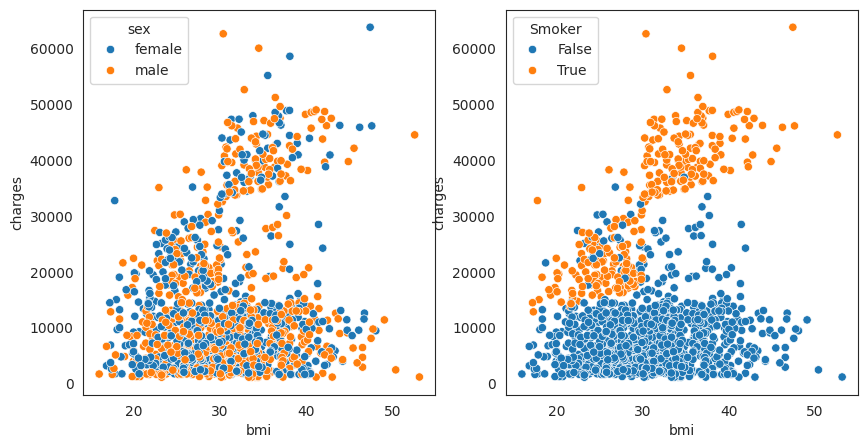

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex",ax=ax[0])
sns.scatterplot(x="bmi",y="charges",data=df,hue="Smoker",ax=ax[1])

In [ ]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)
df.head()

,age,bmi,children,charges,male,northwest,southeast,southwest,Smoker
0,19,27.900,0,16884.92400,False,False,False,True,True
1,18,33.770,1,1725.55230,True,False,True,False,False
2,28,33.000,3,4449.46200,True,False,True,False,False
3,33,22.705,0,21984.47061,True,True,False,False,False
4,32,28.880,0,3866.85520,True,True,False,False,False


<Axes: >

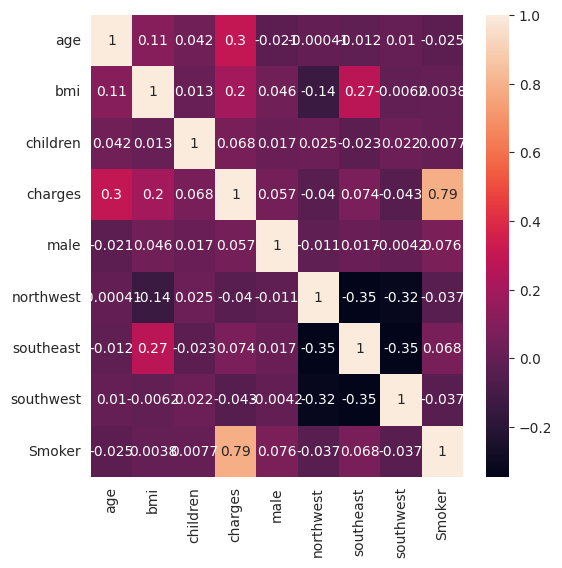

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), annot = True)


In [ ]:
df.corr()

,age,bmi,children,charges,male,northwest,southeast,southwest,Smoker
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.000407,-0.011642,0.010016,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,-0.135996,0.270025,-0.006205,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.024806,-0.023066,0.021914,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,-0.039905,0.073982,-0.043210,0.787251
male,-0.020856,0.046371,0.017163,0.057292,1.000000,-0.011156,0.017117,-0.004184,0.076185
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,1.000000,-0.346265,-0.320829,-0.036945
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,-0.346265,1.000000,-0.346265,0.068498
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.320829,-0.346265,1.000000,-0.036945
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,-0.036945,0.068498,-0.036945,1.000000


In [ ]:
x=df.drop('charges',axis=1)
y=df['charges']
print(x,y)

      age     bmi  children   male  northwest  southeast  southwest  Smoker
0      19  27.900         0  False      False      False       True    True
1      18  33.770         1   True      False       True      False   False
2      28  33.000         3   True      False       True      False   False
3      33  22.705         0   True       True      False      False   False
4      32  28.880         0   True       True      False      False   False
...   ...     ...       ...    ...        ...        ...        ...     ...
1333   50  30.970         3   True       True      False      False   False
1334   18  31.920         0  False      False      False      False   False
1335   18  36.850         0  False      False       True      False   False
1336   21  25.800         0  False      False      False       True   False
1337   61  29.070         0  False       True      False      False    True

[1338 rows x 8 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3  

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(1070, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x_train=sc.fit_transform(x_train)
sc_x_test=sc.transform(x_test)

In [ ]:
#support vector regression model

In [ ]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(sc_x_train,y_train)

SVR()

In [ ]:
predict=regressor.predict(sc_x_test)
predict.shape

(268,)

In [ ]:
y_test.shape

(268,)

In [ ]:
predict[:10]

array([9205.42384352, 9255.32767488, 9221.67386975, 9281.42495991,
       9279.87094571, 9260.63016613, 9195.76295842, 9303.56176634,
       9302.57238139, 9213.33245084])

In [ ]:
y_test[:10]

,charges
813,4428.88785
118,8601.32930
8,6406.41070
458,10601.41200
317,10435.06525
660,6435.62370
882,2585.85065
850,37270.15120
1323,43896.37630
440,4738.26820
